In [1]:
#importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
#reading data set for white wine from the drive
file_path = 'C:\\Users\\vaish\\Wine Quality Prediction\\wine_quality\\winequality-white.csv'
df = pd.read_csv(file_path, sep=';')

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


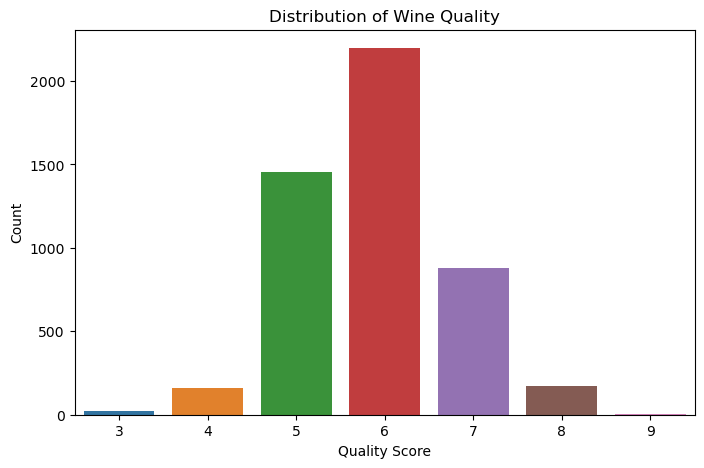

In [7]:
# wine quality score distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='quality')
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

In [8]:
# binning quality scores into categories
def quality_label(q):
    if q <= 4:
        return 0  # low quality
    elif q <= 6:
        return 1  # medium quality
    else:
        return 2  # high quality

df['quality_label'] = df['quality'].apply(quality_label)

In [9]:
# features (X) and Target (y)
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Accuracy: 0.8642857142857143

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        30
           1       0.87      0.97      0.91       723
           2       0.85      0.63      0.73       227

    accuracy                           0.86       980
   macro avg       0.91      0.59      0.64       980
weighted avg       0.87      0.86      0.85       980



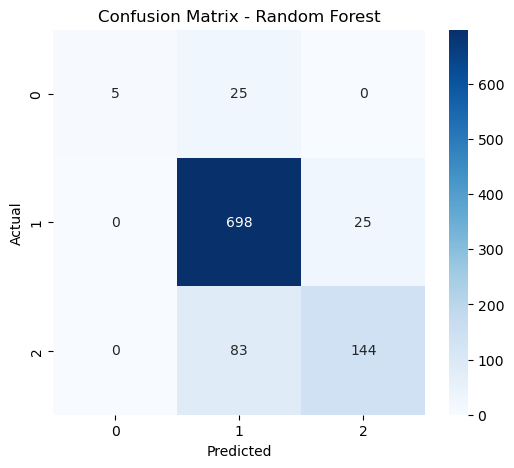

In [10]:
# feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random-Forest Model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# function to take user input
def get_user_input():
    print("\nPlease enter the following wine characteristics:")
    required_inputs = {
        "Fixed Acidity": "Typical range: 3.8 - 14.2",
        "Volatile Acidity": "Typical range: 0.08 - 1.1",
        "Citric Acid": "Typical range: 0.0 - 1.66",
        "Residual Sugar": "Typical range: 0.6 - 65.8",
        "Chlorides": "Typical range: 0.009 - 0.346",
        "Free Sulfur Dioxide": "Typical range: 2 - 289",
        "Total Sulfur Dioxide": "Typical range: 9 - 440",
        "Density": "Typical range: 0.9871 - 1.03898",
        "pH": "Typical range: 2.72 - 3.82",
        "Sulphates": "Typical range: 0.22 - 1.08",
        "Alcohol": "Typical range: 8.0 - 14.2"
    }

    user_input = []
    for feature, range_hint in required_inputs.items():
        while True:
            try:
                value = float(input(f"{feature} ({range_hint}): "))
                user_input.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a numeric (float) value.")
    return user_input

# getting prediction
user_input = get_user_input()
input_df = pd.DataFrame([user_input], columns=X.columns)
scaled_features = scaler.transform(input_df)
predicted_class = rf_model.predict(scaled_features)

label_map = {0: "Low Quality", 1: "Medium Quality", 2: "High Quality"}
print(f"\nPredicted Wine Quality: {label_map[predicted_class[0]]}")


Please enter the following wine characteristics:
Fixed Acidity (Typical range: 3.8 - 14.2): 6.7
Volatile Acidity (Typical range: 0.08 - 1.1): 0.9
Citric Acid (Typical range: 0.0 - 1.66): 0.54
Residual Sugar (Typical range: 0.6 - 65.8): 56.8
Chlorides (Typical range: 0.009 - 0.346): 0.077
Free Sulfur Dioxide (Typical range: 2 - 289): 122
Total Sulfur Dioxide (Typical range: 9 - 440): 343
Density (Typical range: 0.9871 - 1.03898): 0.986
pH (Typical range: 2.72 - 3.82): 3.8
Sulphates (Typical range: 0.22 - 1.08): 0.87
Alcohol (Typical range: 8.0 - 14.2): 12.3

Predicted Wine Quality: Medium Quality
